In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/users/siddharthsmac/downloads/AirPassengers.csv')

In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


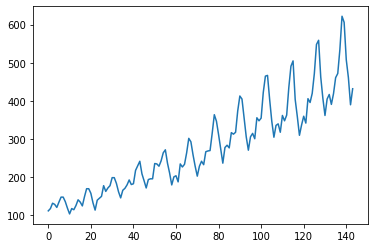

In [4]:
plt.plot(df.iloc[:,1])

### Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(df.iloc[:,1:])

In [7]:
df.shape

(144, 1)

In [8]:
##splitting dataset into train and test split

training_size=int(len(df)*0.65)
test_size=len(df)-training_size

In [9]:
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:]

In [10]:
# convert an array of values into a time-series matrix

def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [11]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4

import numpy

time_step = 4
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [12]:
X_train.shape, y_train.shape

((88, 4), (88,))

In [13]:
# reshape input to be [samples, time steps, features] which is required for LSTM(3-dimensional)

X_train =X_train.reshape(X_train.shape[0], 4, 1)
X_test = X_test.reshape(X_test.shape[0], 4, 1)

## LSTM layers

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [15]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(4,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=1,verbose=1)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 88 samples, validate on 46 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
88/88 [==============================] - 2s 18ms/sample - loss: 0.0139 - val_loss: 0.0274
Epoch 2/100
88/88 [==============================] - 1s 6ms/sample - loss: 0.0067 - val_loss: 0.0296
Epoch 3/100
88/88 [==============================] - 1s 6ms/sample - loss: 0.0060 - val_loss: 0.0262
Epoch 4/100
88/88 [==============================] - 1s 6ms/sample - loss: 0.0056 - val_loss: 0.0272
Epoch 5/100
88/88 [==============================] - 1s 6ms/sample - loss: 0.0069 - val_loss: 0.0273
Epoch 6/100
88/88 [==============================] - 1s 6ms/sample - loss: 0.0057 - val_loss: 0.0246
Epoch 7/100
88/88 [==============================] - 1s 6ms/sample - loss: 0.0049 - val_loss: 0.0244
Epoch 8/100
88/88 [=================

In [16]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [17]:
## Transform back to original form

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [18]:
## Calculate RMSE performance metrics

import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_train,train_predict))

219.41352897636477

In [27]:
## Test Data RMSE

math.sqrt(mean_squared_error(y_test,test_predict))

377.64044912741707

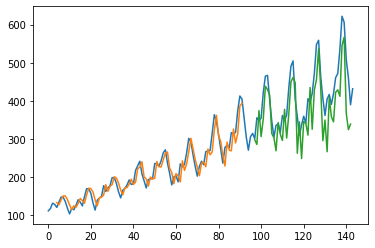

In [29]:
# shift train predictions for plotting

look_back=4  #look_back = timestep
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()